## Pre-Processing & Training

In [1]:
# !pip install category_encoders

In [2]:
# !pip install -U imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version

from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

from sklearn.decomposition import PCA

#Standardize a dataset along any axis. Center to the mean and component wise scale to unit variance.
from sklearn.preprocessing import scale


from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Construct a Pipeline from the given estimators.
from sklearn.pipeline import make_pipeline


from sklearn.feature_selection import SelectKBest, f_regression
import datetime


In [2]:
hearts = pd.read_csv("C:\\Users\\hanna\\OneDrive\\Desktop\\All Folders\\Data Science\\SpringBoard\\Guided Capstone 2\\dummies_data.csv")

In [3]:
hearts.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0


In [4]:
X = hearts.drop(['HeartDisease'], axis = 1)
y = hearts['HeartDisease']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
X_train.shape, X_test.shape

((239846, 50), (79949, 50))

In [7]:
X_train.dtypes

BMI                                    float64
PhysicalHealth                         float64
MentalHealth                           float64
SleepTime                              float64
Smoking_No                               int64
Smoking_Yes                              int64
AlcoholDrinking_No                       int64
AlcoholDrinking_Yes                      int64
Stroke_No                                int64
Stroke_Yes                               int64
DiffWalking_No                           int64
DiffWalking_Yes                          int64
Sex_Female                               int64
Sex_Male                                 int64
AgeCategory_18-24                        int64
AgeCategory_25-29                        int64
AgeCategory_30-34                        int64
AgeCategory_35-39                        int64
AgeCategory_40-44                        int64
AgeCategory_45-49                        int64
AgeCategory_50-54                        int64
AgeCategory_5

In [8]:
# AJS:
print("\n")
print("X_train:", type(X_train), X_train.shape, len(X_train)) #TrainX

# AJS:
print("\n")
print("X_test", type(X_test), X_test.shape, len(X_test)) #TestX

# AJS:
print("\n")
print("y_train", type(y_train), y_train.shape, len(y_train)) #Trainy

# AJS:
print("\n")
print("y_test", type(y_test), y_test.shape, len(y_test)) #Testy



X_train: <class 'pandas.core.frame.DataFrame'> (239846, 50) 239846


X_test <class 'pandas.core.frame.DataFrame'> (79949, 50) 79949


y_train <class 'pandas.core.series.Series'> (239846,) 239846


y_test <class 'pandas.core.series.Series'> (79949,) 79949


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
# AJS: construct the LogisticRegression model
clf = LogisticRegression(max_iter = 500)

# Fit the model on the training data.
clf.fit(X_train, y_train) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test = clf.predict(X_test)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_predict_test, y_test))


# AJS: also printout the training score
y_predict_training = clf.predict(X_train)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(y_train, y_predict_training))




[Test] Accuracy score (y_predict_test, y_test): 0.916021463683098


[Training] Accuracy score: (ylr, y_predict_training) 0.9158668478940654


In [11]:
from sklearn import metrics
print("\n AUC-ROC:", metrics.roc_auc_score(y_test, y_predict_test))


 AUC-ROC: 0.5473974806457024


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[72533,   604],
       [ 6110,   702]], dtype=int64)

In [13]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xlr=sc.fit_transform(X_train)
Xtestlr=sc.transform(X_test)


In [14]:
lr = LogisticRegression()
lr.fit(Xlr,y_train)

y_test_pred = lr.predict(Xtestlr)
print(accuracy_score(y_test_pred,y_test))

0.916021463683098


In [15]:
# AJS: use sklearn.metrics.classification_report for a more comprehensive
# performance analysis

#AJS
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(y_train, y_predict_training))

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219285
           1       0.55      0.11      0.18     20561

    accuracy                           0.92    239846
   macro avg       0.73      0.55      0.57    239846
weighted avg       0.89      0.92      0.89    239846

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73137
           1       0.54      0.10      0.17      6812

    accuracy                           0.92     79949
   macro avg       0.73      0.55      0.56     79949
weighted avg       0.89      0.92      0.89     79949



In [17]:
print("\n AUC-ROC:", metrics.roc_auc_score(y_test, y_test_pred))


 AUC-ROC: 0.5473974806457024


In [18]:
# AJS: Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state=5)

In [19]:
# AJS:
print("\n")
print("Xlr:", type(Xlr), Xlr.shape, len(Xlr)) #TrainX

# AJS:
print("\n")
print("Xtestlr", type(Xtestlr), Xtestlr.shape, len(Xtestlr)) #TestX

# AJS:
print("\n")
print("ylr", type(ylr), ylr.shape, len(ylr)) #Trainy

# AJS:
print("\n")
print("ytestlr", type(ytestlr), ytestlr.shape, len(ytestlr)) #Testy




Xlr: <class 'pandas.core.frame.DataFrame'> (239846, 50) 239846


Xtestlr <class 'pandas.core.frame.DataFrame'> (79949, 50) 79949


ylr <class 'pandas.core.series.Series'> (239846,) 239846


ytestlr <class 'pandas.core.series.Series'> (79949,) 79949


In [20]:
# AJS: construct the LogisticRegression model
clf = LogisticRegression(max_iter = 500)

# Fit the model on the training data.
clf.fit(Xlr, ylr) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test = clf.predict(Xtestlr)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))

# AJS: also printout the training score
y_predict_training = clf.predict(Xlr)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(ylr, y_predict_training))



[Test] Accuracy score (y_predict_test, ytestlr): 0.9163967028980975


[Training] Accuracy score: (ylr, y_predict_training) 0.9157876303961708


In [21]:
#AJS
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219316
           1       0.54      0.11      0.18     20530

    accuracy                           0.92    239846
   macro avg       0.73      0.55      0.57    239846
weighted avg       0.89      0.92      0.89    239846

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.56      0.11      0.18      6843

    accuracy                           0.92     79949
   macro avg       0.74      0.55      0.57     79949
weighted avg       0.89      0.92      0.89     79949



In [22]:
from sklearn import metrics
print("\n AUC-ROC:", metrics.roc_auc_score(y_test, y_predict_test))


 AUC-ROC: 0.5002080571592123


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score


In [24]:
X = hearts.drop('HeartDisease', axis=1)
y = hearts['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)

In [25]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=.95)),
         ('clf', LogisticRegression())]

pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219316
           1       0.53      0.10      0.17     20530

    accuracy                           0.92    239846
   macro avg       0.72      0.55      0.56    239846
weighted avg       0.89      0.92      0.89    239846

TEST:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.53      0.10      0.16      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.54      0.56     79949
weighted avg       0.89      0.92      0.89     79949



In [26]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=.99)),
         ('clf', LogisticRegression())]

pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    219316
           1       0.53      0.10      0.17     20530

    accuracy                           0.92    239846
   macro avg       0.73      0.55      0.56    239846
weighted avg       0.89      0.92      0.89    239846

TEST:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73106
           1       0.54      0.10      0.18      6843

    accuracy                           0.92     79949
   macro avg       0.73      0.55      0.57     79949
weighted avg       0.89      0.92      0.89     79949



In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10)
X_smote, y_smote = smote.fit_resample(X_train, y_train)



In [28]:
X_smote.shape, y_smote.shape

((438632, 50), (438632,))

In [29]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X_smote, y_smote, random_state=5)

In [47]:
Xlr.shape, ylr.shape

((328974, 50), (328974,))

In [30]:
# AJS: construct the LogisticRegression model
clf = LogisticRegression(max_iter = 500)

# Fit the model on the training data.
clf.fit(Xlr, ylr) 

# Print the accuracy from the testing data.
# AJS: introduce variable to be reused later
y_predict_test = clf.predict(Xtestlr)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))

# AJS: also printout the training score
y_predict_training = clf.predict(Xlr)
print("\n")
print("[Training] Accuracy score: (ylr, y_predict_training)",accuracy_score(ylr, y_predict_training))



[Test] Accuracy score (y_predict_test, ytestlr): 0.9123547757573547


[Training] Accuracy score: (ylr, y_predict_training) 0.9121906290466724


C:\Users\hanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#AJS
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92    164540
           1       0.96      0.86      0.91    164434

    accuracy                           0.91    328974
   macro avg       0.92      0.91      0.91    328974
weighted avg       0.92      0.91      0.91    328974

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     54776
           1       0.96      0.86      0.91     54882

    accuracy                           0.91    109658
   macro avg       0.92      0.91      0.91    109658
weighted avg       0.92      0.91      0.91    109658



In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytestlr, y_predict_test)
cm

array([[52620,  2156],
       [ 7455, 47427]], dtype=int64)

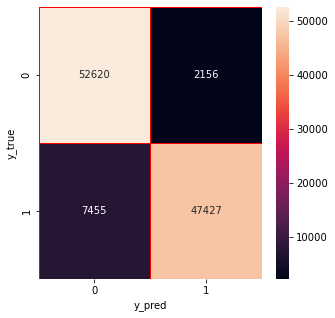

In [33]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [34]:
print("\n AUC-ROC:", metrics.roc_auc_score(ytestlr, y_predict_test))


 AUC-ROC: 0.9124014049032383


In [41]:
# from sklearn.preprocessing import PowerTransformer
# pow_trans = PowerTransformer()
# pow_trans.fit(hearts[['MentalHealth']])
# hearts['MentalHealth_LG'] = pow_trans.transform(hearts[['MentalHealth']])
# #hearts['MentalHealth'].plot(kind = 'hist')
# hearts['MentalHealth_LG'].plot(kind = 'hist', title = 'MentalHealth With PowerTranformer')

In [42]:
# mental_log = np.log1p(hearts['MentalHealth'])
# mental_log.plot(kind='hist', title = 'MentalHealth With np.log1p')
# hearts['MentalHealth'].unique()

In [43]:
# from sklearn.preprocessing import PowerTransformer
# pow_trans = PowerTransformer()
# pow_trans.fit(hearts[['PhysicalHealth']])
# hearts['PhysicalHealth_LG'] = pow_trans.transform(hearts[['PhysicalHealth']])
# #hearts['MentalHealth'].plot(kind = 'hist')
# hearts['PhysicalHealth_LG'].plot(kind = 'hist', title = 'PhysicalHealth With PowerTranformer')

In [44]:
# Physical_log = np.log1p(hearts['PhysicalHealth'])
# Physical_log.plot(kind='hist', title = 'PhysicalHealth With np.log1p')

In [45]:
# hearts.head()

In [46]:

# sns.heatmap(hearts.corr())

first train test split 
and then standardizaiton 

1. logistic regression case study review - Basic LR model, classification report for both, train/test using stratification
2. check for overfitting. 
3. check for best C. 

